# 作业二 q2

In [224]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [240]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

In [302]:
import seaborn as sns
%matplotlib inline
p = sns.color_palette()
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [239]:
churn = pd.read_csv(r"C:\Users\youlin\Desktop\churn.csv")

In [241]:
# 读入数据集
churn = pd.read_csv(r"C:\Users\youlin\Desktop\churn.csv")
# 有序变量编码
leave_map = {"LEAVE": 1, "STAY": 0}
sat_map = {"very_unsat": 1, "unsat": 2, "avg": 3, "sat": 4, "very_sat": 5}  # 越大越满意
useage_map = {"very_little": 1, "little": 2, "avg": 3, "high": 4, "very_high": 5}  
change_map = {"no": 1, "considering": 2, "perhaps": 3, "never_thought": 4, "actively_looking_into_it": 5}  # 越大约可能换
churn['LEAVE'] = churn['LEAVE'].map(leave_map)
churn['REPORTED_SATISFACTION'] = churn['REPORTED_SATISFACTION'].map(sat_map)
churn['REPORTED_USAGE_LEVEL'] = churn['REPORTED_USAGE_LEVEL'].map(useage_map)
churn['CONSIDERING_CHANGE_OF_PLAN'] = churn['CONSIDERING_CHANGE_OF_PLAN'].map(change_map)
# 无序分类变量one-hot
churn = pd.get_dummies(churn)
# 将标记放在第一列
cols=list(churn)
lable_i = cols.index("LEAVE")
cols[0], cols[lable_i] = cols[lable_i], cols[0]
churn = churn.reindex(columns=cols)

In [309]:
# 十折交叉验证
model_lib = {'dtc': tree.DecisionTreeClassifier(min_samples_leaf=30), 'logreg': linear_model.LogisticRegression()}
output = {}
for size in range(156, churn.shape[0], 5):
    print(size)
    output[size] = {}
    train = churn.sample(size)
    for model in ['dtc', 'logreg']:
        output[size][model] = {}
        scores_roc = cross_val_score(model_lib[model], train.iloc[:, 1:], train.iloc[:, 0], cv=10, scoring='roc_auc')
        scores_accuracy = cross_val_score(model_lib[model], train.iloc[:, 1:], train.iloc[:, 0], cv=10, scoring='accuracy')
        output[size][model]['roc'] = scores_roc.mean() # roc值
        output[size][model]['accuracy'] = scores_accuracy.mean() # accuracy值

156
161
166
171
176
181
186
191
196
201
206
211
216
221
226
231
236
241
246
251
256
261
266
271
276
281
286
291
296
301
306
311
316
321
326
331
336
341
346
351
356
361
366
371
376
381
386
391
396
401
406
411
416
421
426
431
436
441
446
451
456
461
466
471
476
481
486
491
496
501
506
511
516
521
526
531
536
541
546
551
556
561
566
571
576
581
586
591
596
601
606
611
616
621
626
631
636
641
646
651
656
661
666
671
676
681
686
691
696
701
706
711
716
721
726
731
736
741
746
751
756
761
766
771
776
781
786
791
796
801
806
811
816
821
826
831
836
841
846
851
856
861
866
871
876
881
886
891
896
901
906
911
916
921
926
931
936
941
946
951
956
961
966
971
976
981
986
991
996
1001
1006
1011
1016
1021
1026
1031
1036
1041
1046
1051
1056
1061
1066
1071
1076
1081
1086
1091
1096
1101
1106
1111
1116
1121
1126
1131
1136
1141
1146
1151
1156
1161
1166
1171
1176
1181
1186
1191
1196
1201
1206
1211
1216
1221
1226
1231
1236
1241
1246
1251
1256
1261
1266
1271
1276
1281
1286
1291
1296
1301
1306
1311
1316
1321

8521
8526
8531
8536
8541
8546
8551
8556
8561
8566
8571
8576
8581
8586
8591
8596
8601
8606
8611
8616
8621
8626
8631
8636
8641
8646
8651
8656
8661
8666
8671
8676
8681
8686
8691
8696
8701
8706
8711
8716
8721
8726
8731
8736
8741
8746
8751
8756
8761
8766
8771
8776
8781
8786
8791
8796
8801
8806
8811
8816
8821
8826
8831
8836
8841
8846
8851
8856
8861
8866
8871
8876
8881
8886
8891
8896
8901
8906
8911
8916
8921
8926
8931
8936
8941
8946
8951
8956
8961
8966
8971
8976
8981
8986
8991
8996
9001
9006
9011
9016
9021
9026
9031
9036
9041
9046
9051
9056
9061
9066
9071
9076
9081
9086
9091
9096
9101
9106
9111
9116
9121
9126
9131
9136
9141
9146
9151
9156
9161
9166
9171
9176
9181
9186
9191
9196
9201
9206
9211
9216
9221
9226
9231
9236
9241
9246
9251
9256
9261
9266
9271
9276
9281
9286
9291
9296
9301
9306
9311
9316
9321
9326
9331
9336
9341
9346
9351
9356
9361
9366
9371
9376
9381
9386
9391
9396
9401
9406
9411
9416
9421
9426
9431
9436
9441
9446
9451
9456
9461
9466
9471
9476
9481
9486
9491
9496
9501
9506
9511
9516


15596
15601
15606
15611
15616
15621
15626
15631
15636
15641
15646
15651
15656
15661
15666
15671
15676
15681
15686
15691
15696
15701
15706
15711
15716
15721
15726
15731
15736
15741
15746
15751
15756
15761
15766
15771
15776
15781
15786
15791
15796
15801
15806
15811
15816
15821
15826
15831
15836
15841
15846
15851
15856
15861
15866
15871
15876
15881
15886
15891
15896
15901
15906
15911
15916
15921
15926
15931
15936
15941
15946
15951
15956
15961
15966
15971
15976
15981
15986
15991
15996
16001
16006
16011
16016
16021
16026
16031
16036
16041
16046
16051
16056
16061
16066
16071
16076
16081
16086
16091
16096
16101
16106
16111
16116
16121
16126
16131
16136
16141
16146
16151
16156
16161
16166
16171
16176
16181
16186
16191
16196
16201
16206
16211
16216
16221
16226
16231
16236
16241
16246
16251
16256
16261
16266
16271
16276
16281
16286
16291
16296
16301
16306
16311
16316
16321
16326
16331
16336
16341
16346
16351
16356
16361
16366
16371
16376
16381
16386
16391
16396
16401
16406
16411
16416
16421
1642

In [431]:
scores_roc_dtc = cross_val_score(model_lib['dtc'], train.iloc[:, 1:], train.iloc[:, 0], cv=40, scoring='accuracy')
scores_roc_log = cross_val_score(model_lib['logreg'], train.iloc[:, 1:], train.iloc[:, 0], cv=40, scoring='accuracy')

In [432]:
print(scores_roc_dtc.std(), scores_roc_log.std())

0.0179541836717 0.0272760719976


In [310]:
dtc_info={key: output[key]['dtc'] for key in output if output[key]}
logreg_info={key: output[key]['logreg'] for key in output if output[key]}

In [311]:
part1 = pd.DataFrame(dtc_info).T
part1 = part1.reset_index().rename(columns={"index": "size"})
part1['model'] = 'dtc'
part2 = pd.DataFrame(logreg_info).T
part2 = part2.reset_index().rename(columns={"index": "size"})
part2['model'] = 'logreg'

In [416]:
dtc= tree.DecisionTreeClassifier(min_samples_leaf=30)

In [417]:
y = train.iloc[:, 0]
X = train.iloc[:, 1:]

In [418]:
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [419]:
# 确定某个样本的决策路径
sample_id = 120
node_indicator = dtc.decision_path(X)
leave_id = dtc.apply(X)
feature = dtc.tree_.feature
threshold = dtc.tree_.threshold
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:

    if leave_id[sample_id] == node_id:  # <-- changed != to ==
        #continue # <-- comment out
        print("leaf node {} reached, no decision here".format(leave_id[sample_id])) # <--

    else: # < -- added else to iterate through decision nodes
        if (X.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("decision id node %s : (X.iloc[%s, %s] (= %s) %s %s)"
              % (node_id,
                 sample_id,
                 feature[node_id],
                 X.iloc[sample_id, feature[node_id]], # <-- changed i to sample_id
                 threshold_sign,
                 threshold[node_id]))

Rules used to predict sample 120: 
decision id node 0 : (X.iloc[120, 2] (= 567508) <= 600479.5)
decision id node 1 : (X.iloc[120, 0] (= 60) <= 97.5)
decision id node 2 : (X.iloc[120, 1] (= 0) <= 24.5)
decision id node 3 : (X.iloc[120, 1] (= 0) <= 2.5)
decision id node 4 : (X.iloc[120, 9] (= 54000) <= 59923.5)
decision id node 5 : (X.iloc[120, 10] (= 1) > 0.5)
decision id node 35 : (X.iloc[120, 2] (= 567508) > 277901.0)
decision id node 47 : (X.iloc[120, 9] (= 54000) > 26207.0)
decision id node 49 : (X.iloc[120, 2] (= 567508) > 311297.0)
decision id node 51 : (X.iloc[120, 9] (= 54000) > 46115.5)
decision id node 59 : (X.iloc[120, 0] (= 60) > 39.5)
leaf node 61 reached, no decision here


In [426]:
dtc.predict(X.iloc[120:121,:])

array([0], dtype=int64)

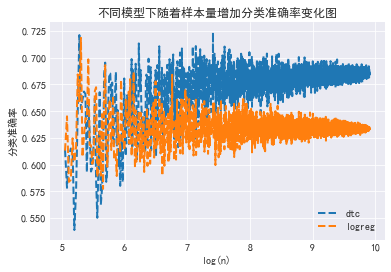

In [318]:
fig, ax = plt.subplots()
line1, = ax.plot(np.log(part1['size']), part1['accuracy'], '--', linewidth=2, label='dtc')
line2, = ax.plot(np.log(part2['size']), part2['accuracy'], '--', linewidth=2, label='logreg')
ax.legend(loc='lower right')
ax.set_title("不同模型下随着样本量增加分类准确率变化图")
ax.set_xlabel("log(n)")
ax.set_ylabel("分类准确率")
plt.savefig(r"C:\Users\youlin\Desktop\plot1.png")

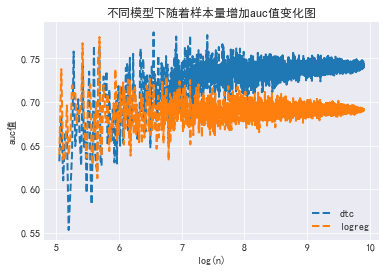

In [319]:
fig, ax = plt.subplots()
line1, = ax.plot(np.log(part1['size']), part1['roc'], '--', linewidth=2, label='dtc')
line2, = ax.plot(np.log(part2['size']), part2['roc'], '--', linewidth=2, label='logreg')
ax.legend(loc='lower right')
ax.set_title("不同模型下随着样本量增加auc值变化图")
ax.set_xlabel("log(n)")
ax.set_ylabel("auc值")
plt.savefig(r"C:\Users\youlin\Desktop\plot2.png")

In [397]:
# 输出树图
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf(r"C:\Users\youlin\Desktop\tree1.pdf")

In [385]:
#n_nodes = dtc.tree_.node_count
n_nodes_ = [dtc.tree_.node_count]
children_left_ = [dtc.tree_.children_left]
children_right_ = [dtc.tree_.children_right]
feature_ = [dtc.tree_.feature]
threshold_ = [dtc.tree_.threshold]


def explore_tree( n_nodes, children_left,children_right, feature,threshold,
                suffix='', print_tree= False, sample_id=0, feature_names=None):

    if not feature_names:
        feature_names = feature


    assert len(feature_names) == X.shape[1], "The feature names do not match the number of features."
    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)

    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        print(node_id)
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("The binary tree structure has %s nodes"
          % n_nodes)
    if print_tree:
        print("Tree structure: \n")
        for i in range(n_nodes):
            if is_leaves[i]:
                print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
            else:
                print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
                      "node %s."
                      % (node_depth[i] * "\t",
                         i,
                         children_left[i],
                         feature[i],
                         threshold[i],
                         children_right[i],
                         ))
            print("\n")
        print()

    # First let's retrieve the decision path of each sample. The decision_path
    # method allows to retrieve the node indicator functions. A non zero element of
    # indicator matrix at the position (i, j) indicates that the sample i goes
    # through the node j.

    node_indicator = dtc.decision_path(X)

    # Similarly, we can also have the leaves ids reached by each sample.

    leave_id = dtc.apply(X)

    # Now, it's possible to get the tests that were used to predict a sample or
    # a group of samples. First, let's make it for the sample.

    #sample_id = 0
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print(X[sample_id,:])

    print('Rules used to predict sample %s: ' % sample_id)
    for node_id in node_index:
        # tabulation = " "*node_depth[node_id] #-> makes tabulation of each level of the tree
        tabulation = ""
        if leave_id[sample_id] == node_id:
            print("%s==> Predicted leaf index \n"%(tabulation))
            #continue

        if (X[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("%sdecision id node %s : (X[%s, '%s'] (= %s) %s %s)"
              % (tabulation,
                 node_id,
                 sample_id,
                 feature_names[feature[node_id]],
                 X[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
    print("%sPrediction for sample %d: %s"%(tabulation,
                                          sample_id,
                                          dtc.predict(X)[sample_id]))

    # For a group of samples, we have the following common node.
    sample_ids = [sample_id, 1]
    common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                    len(sample_ids))

    common_node_id = np.arange(n_nodes)[common_nodes]

    print("\nThe following samples %s share the node %s in the tree"
          % (sample_ids, common_node_id))
    print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

    for sample_id_ in sample_ids:
        print("Prediction for sample %d: %s"%(sample_id_,
                                          dtc.predict(X)[sample_id_]))

In [166]:
scores_accuracy = cross_val_score(dtc, X_train, y_train, cv=10, scoring='accuracy')

In [169]:
Logreg = linear_model.LogisticRegression()
scores_roc = cross_val_score(Logreg, X_train, y_train, cv=10, scoring='roc_auc')
scores_roc

array([ 0.67027864,  0.67557839,  0.68908661,  0.70691616,  0.68516228,
        0.73024903,  0.67370756,  0.68430876,  0.68004661,  0.70940943])

In [436]:
churn.shape

(20000, 13)

In [440]:
output = {}
for num in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(churn.iloc[:, 1:], churn.iloc[:, 0], train_size=0.75, stratify=churn.iloc[:, 0])
    dtc= tree.DecisionTreeClassifier(min_samples_leaf=30)
    dtc.fit(X_train, y_train)
    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)
    output[num] = accuracy_score(y_test, y_test_pred) - accuracy_score(y_train, y_train_pred)

E:\06_software\Anoconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [444]:
output

{0: -0.075066666666666615,
 1: -0.068333333333333357,
 2: -0.049599999999999977,
 3: -0.069666666666666655,
 4: -0.067133333333333378,
 5: -0.064533333333333331,
 6: -0.049133333333333362,
 7: -0.068400000000000016,
 8: -0.066733333333333422,
 9: -0.052133333333333365,
 10: -0.060266666666666691,
 11: -0.087600000000000011,
 12: -0.065266666666666695,
 13: -0.07240000000000002,
 14: -0.053533333333333322,
 15: -0.050533333333333319,
 16: -0.068200000000000038,
 17: -0.062133333333333374,
 18: -0.060266666666666691,
 19: -0.073000000000000065,
 20: -0.058933333333333282,
 21: -0.066066666666666718,
 22: -0.059666666666666646,
 23: -0.061133333333333373,
 24: -0.075733333333333319,
 25: -0.056799999999999962,
 26: -0.058400000000000007,
 27: -0.071599999999999997,
 28: -0.074000000000000066,
 29: -0.070466666666666677,
 30: -0.068733333333333313,
 31: -0.050666666666666638,
 32: -0.073799999999999977,
 33: -0.077600000000000002,
 34: -0.058733333333333304,
 35: -0.068866666666666632,
 36